# Movie IMDB Analysis

The dataset in use is the "IMDB-Movie-Data," which encompasses a wide array of information on various movies and TV shows. Each entry in this dataset contains multiple attributes, such as the title, type (distinguishing between a TV show and a movie), a succinct summary of the plot, release year, age certification, and duration (episodes' length for TV shows and overall duration for movies). Additionally, it includes the IMDb score, number of votes received on IMDb, directors' names, cast details, revenue generated (in millions), and Metascore. This rich dataset provides a comprehensive view of the entertainment titles, useful for conducting analyses and developing machine learning models to predict IMDb ratings for new titles.

The dataset can be found in CSV format at the provided GitHub link. Below is a snippet of the dataset, showcasing the initial rows with their respective columns like rank, title, genre, description, director, cast, year of release, runtime, IMDb rating, votes, revenue, and Metascore.

https://github.com/victoramsantos/netflix-backend/blob/master/movie-scraper/resources/dataset/IMDB-Movie-Data.csv

## Cleaning the data

In [109]:
import pandas as pd
data = pd.read_csv('IMDB-Movie-Data.csv')
print(data.head())


   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### Handling Missing Values

We'll identify and handle missing values in the dataset.

In [110]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    127
Metascore              64
Unnamed: 12           998
dtype: int64


### Data Type Conversion

Ensuring all columns are in the correct format is essential.

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   object 
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   float64
 10  Revenue (Millions)  873 non-null    float64
 11  Metascore           936 non-null    float64
 12  Unnamed: 12         2 non-null      float64
dtypes: float64(5), int64(2), object(6)
memory usage: 101.7+ KB


In [112]:
# Identify non-numeric rows in 'Year' column
non_numeric_years = data[~data['Year'].str.isnumeric()]

# Display these rows to verify 
print(non_numeric_years)

# Remove these rows from the DataFrame
data = data[data['Year'].str.isnumeric()]

# Convert 'Year' column to integer type
data['Year'] = data['Year'].astype(int)

# Convert 'Votes' to integer
data['Votes'] = data['Votes'].astype(int)

# Verify changes
print(data.head())

     Rank                  Title                    Genre  \
356   357   Demain tout commence             Comedy,Drama   
878   879  G.I. Joe: Retaliation  Action,Adventure,Sci-Fi   
970   971      Texas Chainsaw 3D          Horror,Thriller   

                                           Description  \
356  Samuel parties hard in the Marseille area of F...   
878  The G.I. Joes are not only fighting their mort...   
970  A young woman travels to Texas to collect an i...   

                                              Director           Actors  \
356              he gives chase ... See full summary »       Hugo Gélin   
878   they are forced to contend with threats from ...       Jon M. Chu   
970   little does she know that an encounter with a...  John Luessenhop   

                                                  Year  Runtime (Minutes)  \
356  Omar Sy, Clémence Poésy, Antoine Bertrand, Ash...               2016   
878  Dwayne Johnson, Channing Tatum, Adrianne Palic...             

### Duplicate Data
Let's check for and remove any duplicate entries

In [113]:
# Remove duplicates
data_no_duplicates = data.drop_duplicates()

# Displaying the shape of the dataset before and after removing duplicates
data.shape, data_no_duplicates.shape

# There were no duplicates


((997, 13), (997, 13))

### Columns

Now, we'll drop irrelevant columns, such as 'Unnamed: 12'.

In [114]:
# Drop irrelevant columns
data = data.drop('Unnamed: 12', axis=1)

# Displaying the first few rows of the final dataset
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Parsing and Splitting Columns

Splitting columns with multiple values.

In [115]:
import re

# Resplitting the 'Genre' and 'Actors' columns to handle commas with and without following spaces
data['Genre'] = data['Genre'].apply(lambda x: x.split(','))
data['Actors'] = data['Actors'].apply(lambda x: re.split(',\s*', x))  # Handles commas with or without spaces

# Displaying the first few rows to verify the changes
print(data[['Title', 'Genre', 'Actors']].head())


                     Title                         Genre  \
0  Guardians of the Galaxy   [Action, Adventure, Sci-Fi]   
1               Prometheus  [Adventure, Mystery, Sci-Fi]   
2                    Split            [Horror, Thriller]   
3                     Sing   [Animation, Comedy, Family]   
4            Suicide Squad  [Action, Adventure, Fantasy]   

                                              Actors  
0  [Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...  
1  [Noomi Rapace, Logan Marshall-Green, Michael F...  
2  [James McAvoy, Anya Taylor-Joy, Haley Lu Richa...  
3  [Matthew McConaughey, Reese Witherspoon, Seth ...  
4  [Will Smith, Jared Leto, Margot Robbie, Viola ...  


## Exploring the data

### Summary of the central tendency, dispersion, and shape of the dataset's distribution

In [116]:
stats = data.describe()

mode_data = data.mode().loc[0]
stats.loc['mode'] = mode_data

print(stats)


              Rank         Year  Runtime (Minutes)      Rating         Votes  \
count   997.000000   997.000000         997.000000  997.000000  9.970000e+02   
mean    499.792377  2012.779338         113.191575    6.725376  1.701239e+05   
std     288.583868     3.209151          18.826368    0.944190  1.889271e+05   
min       1.000000  2006.000000          66.000000    1.900000  6.100000e+01   
25%     250.000000  2010.000000         100.000000    6.200000  3.631200e+04   
50%     500.000000  2014.000000         111.000000    6.800000  1.108250e+05   
75%     749.000000  2016.000000         123.000000    7.400000  2.403230e+05   
max    1000.000000  2016.000000         191.000000    9.000000  1.791916e+06   
mode      1.000000  2016.000000         108.000000    7.100000  2.910000e+02   

       Revenue (Millions)   Metascore  
count          870.000000  934.000000  
mean            82.966805   59.001071  
std            103.350419   17.202813  
min              0.000000   11.000000  

### Correlation matrix

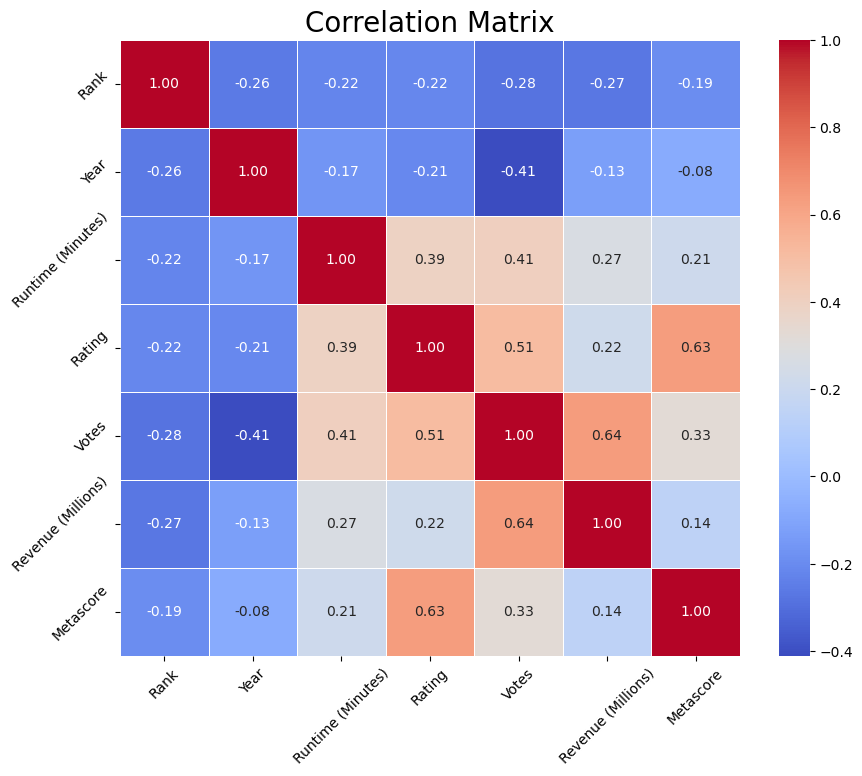

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
correlation_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding titles and labels
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


### Genre Analysis


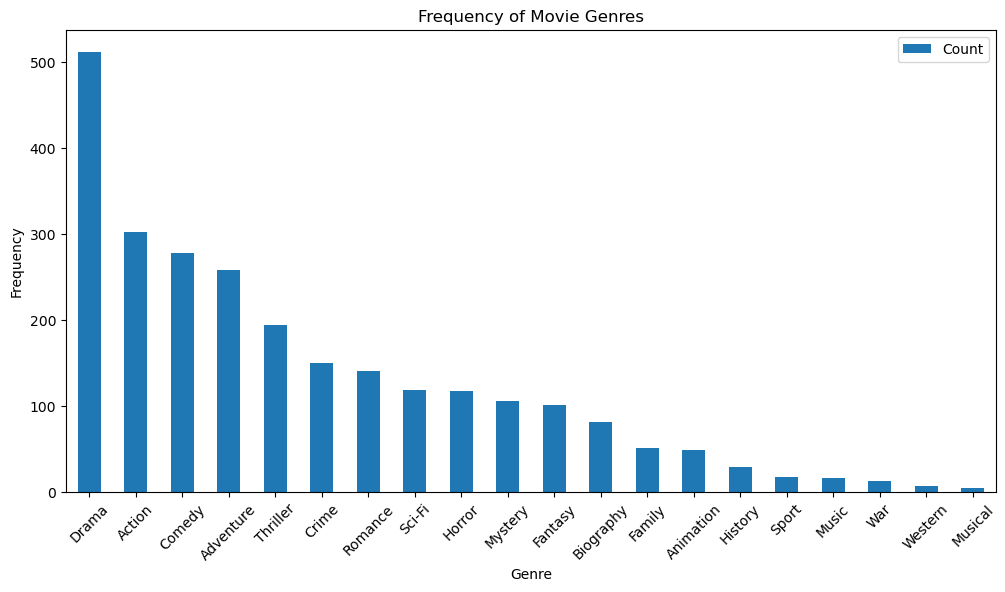

In [117]:
from collections import Counter

# Flatten the list of genres and count the frequency of each genre
genre_counts = Counter([genre for sublist in data['Genre'] for genre in sublist])

# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])

# Plotting
genre_df.sort_values('Count', ascending=False).plot(kind='bar', figsize=(12, 6))

plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


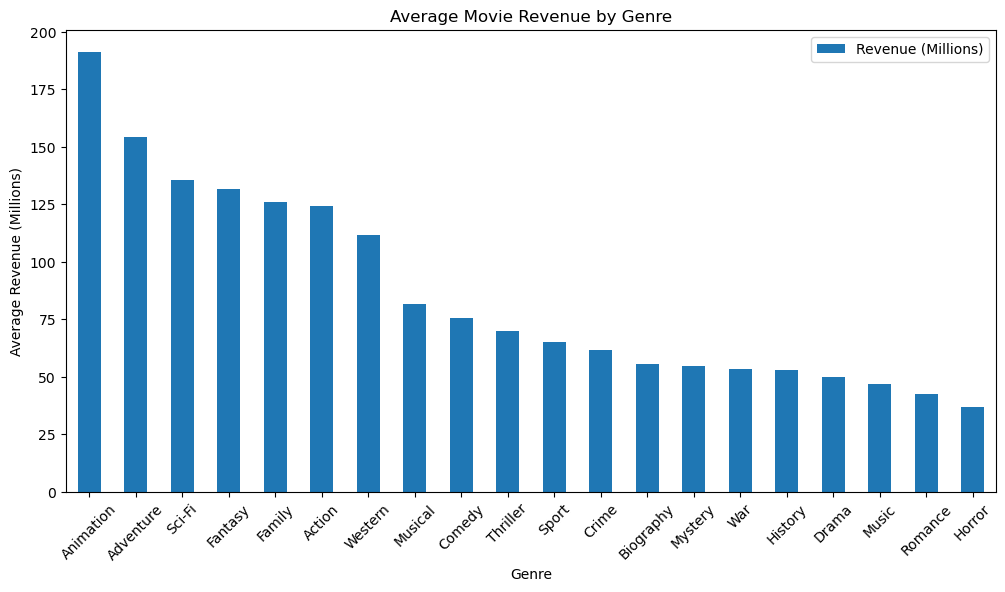

In [125]:
expanded_genre_revenue = []
for index, row in data.iterrows():
    for genre in row['Genre']:
        expanded_genre_revenue.append({'Genre': genre, 'Revenue (Millions)': row['Revenue (Millions)']})

expanded_genre_revenue_df = pd.DataFrame(expanded_genre_revenue)

# Group by genre and calculate average revenue
average_revenue_by_genre = expanded_genre_revenue_df.groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False)

# Convert to DataFrame for easy plotting
average_revenue_by_genre_df = pd.DataFrame(average_revenue_by_genre).reset_index()

# Plotting
average_revenue_by_genre_df.plot(x='Genre', y='Revenue (Millions)', kind='bar', figsize=(12, 6))

plt.title('Average Movie Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()


### Actor Analysis


#### Most frequent actors in movies

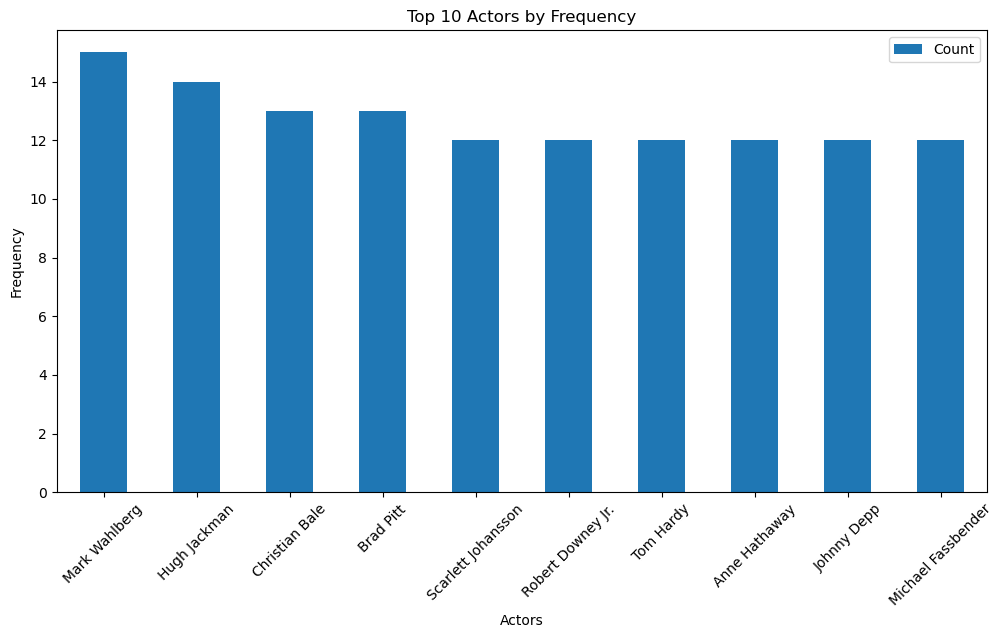

In [123]:
# Flatten the list of actors and count the frequency of each one
actor_counts = Counter([actor for sublist in data['Actors'] for actor in sublist])

# Convert to DataFrame for easy plotting
actor_df = pd.DataFrame.from_dict(actor_counts, orient='index', columns=['Count'])

# Sort the DataFrame and select the top 10
top_actors_df = actor_df.sort_values('Count', ascending=False).head(10)

# Plotting
top_actors_df.plot(kind='bar', figsize=(12, 6))

plt.title('Top 10 Actors by Frequency')
plt.xlabel('Actors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Actors and Movie Revenue

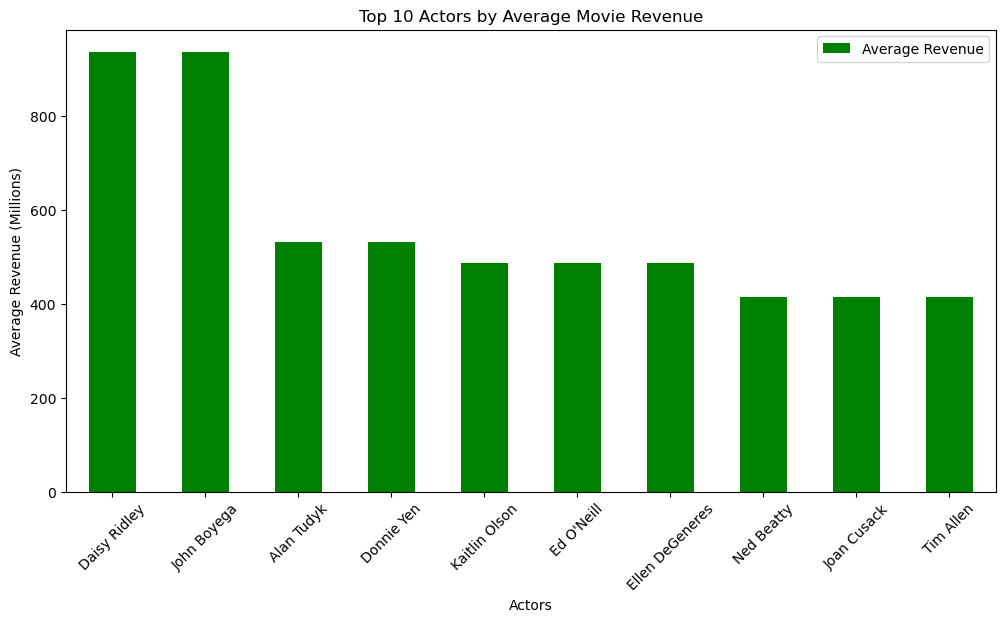

In [127]:
actor_revenues = {actor: [] for actor in actor_counts}
for index, row in data.iterrows():
    for actor in row['Actors']:
        actor_revenues[actor].append(row['Revenue (Millions)'])

# Calculate the average revenue for each actor
average_revenues = {actor: sum(revenues)/len(revenues) if revenues else 0 for actor, revenues in actor_revenues.items()}

# Convert to DataFrame and sort
average_revenues_df = pd.DataFrame.from_dict(average_revenues, orient='index', columns=['Average Revenue'])
top_actors_revenue_df = average_revenues_df.sort_values('Average Revenue', ascending=False).head(10)
top_actors_revenue_df.plot(kind='bar', color='green', figsize=(12, 6))

plt.title('Top 10 Actors by Average Movie Revenue')
plt.xlabel('Actors')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()


### Director Analysis

In [134]:
# Calculate the average rating and revenue for each director
director_avg_stats = data.groupby('Director').agg({'Rating': 'mean', 'Revenue (Millions)': 'mean'}).reset_index()


In [136]:
# Top 10 directors by average rating
top10_directors_by_rating = director_avg_stats.sort_values(by='Rating', ascending=False).head(10)

# Top 10 directors by average revenue
top10_directors_by_revenue = director_avg_stats.sort_values(by='Revenue (Millions)', ascending=False).head(10)

# Apply styling to the DataFrames
styled_top10_directors_by_rating = top10_directors_by_rating.style.set_table_attributes("style='display:inline'").set_caption('Top 10 Directors by Average Movie Rating').background_gradient(cmap='viridis').format({'Rating': "{:.2f}", 'Revenue (Millions)': "${:,.2f}"})
styled_top10_directors_by_revenue = top10_directors_by_revenue.style.set_table_attributes("style='display:inline'").set_caption('Top 10 Directors by Average Movie Revenue').background_gradient(cmap='plasma').format({'Rating': "{:.2f}", 'Revenue (Millions)': "${:,.2f}"})

# Displaying the styled results
from IPython.display import display, HTML

display(HTML(styled_top10_directors_by_rating._repr_html_()))
display(HTML("<br>"))  # Adding space between tables
display(HTML(styled_top10_directors_by_revenue._repr_html_()))



,Director,Rating,Revenue (Millions)
463,Nitesh Tiwari,8.80,$11.15
108,Christopher Nolan,8.68,$303.02
390,Makoto Shinkai,8.60,$4.68
468,Olivier Nakache,8.60,$13.18
0,Aamir Khan,8.50,$1.20
194,Florian Henckel von Donnersmarck,8.50,$11.28
122,Damien Chazelle,8.40,$82.08
450,Naoko Yamada,8.40,$nan
25,Amber Tamblyn,8.30,$nan
506,Rajkumar Hirani,8.30,$8.54


,Director,Rating,Revenue (Millions)
260,James Cameron,7.80,$760.51
114,Colin Trevorrow,7.00,$652.18
339,Joss Whedon,7.75,$541.13
375,Lee Unkrich,8.30,$414.98
208,Gary Ross,7.05,$408.00
94,Chris Buck,7.50,$400.74
98,Chris Renaud,6.60,$368.31
204,Gareth Edwards,7.15,$366.41
606,Tim Miller,8.00,$363.02
85,Byron Howard,8.10,$341.26


## Actor Networks

#### Actor collaboration graph (Largest connected component)

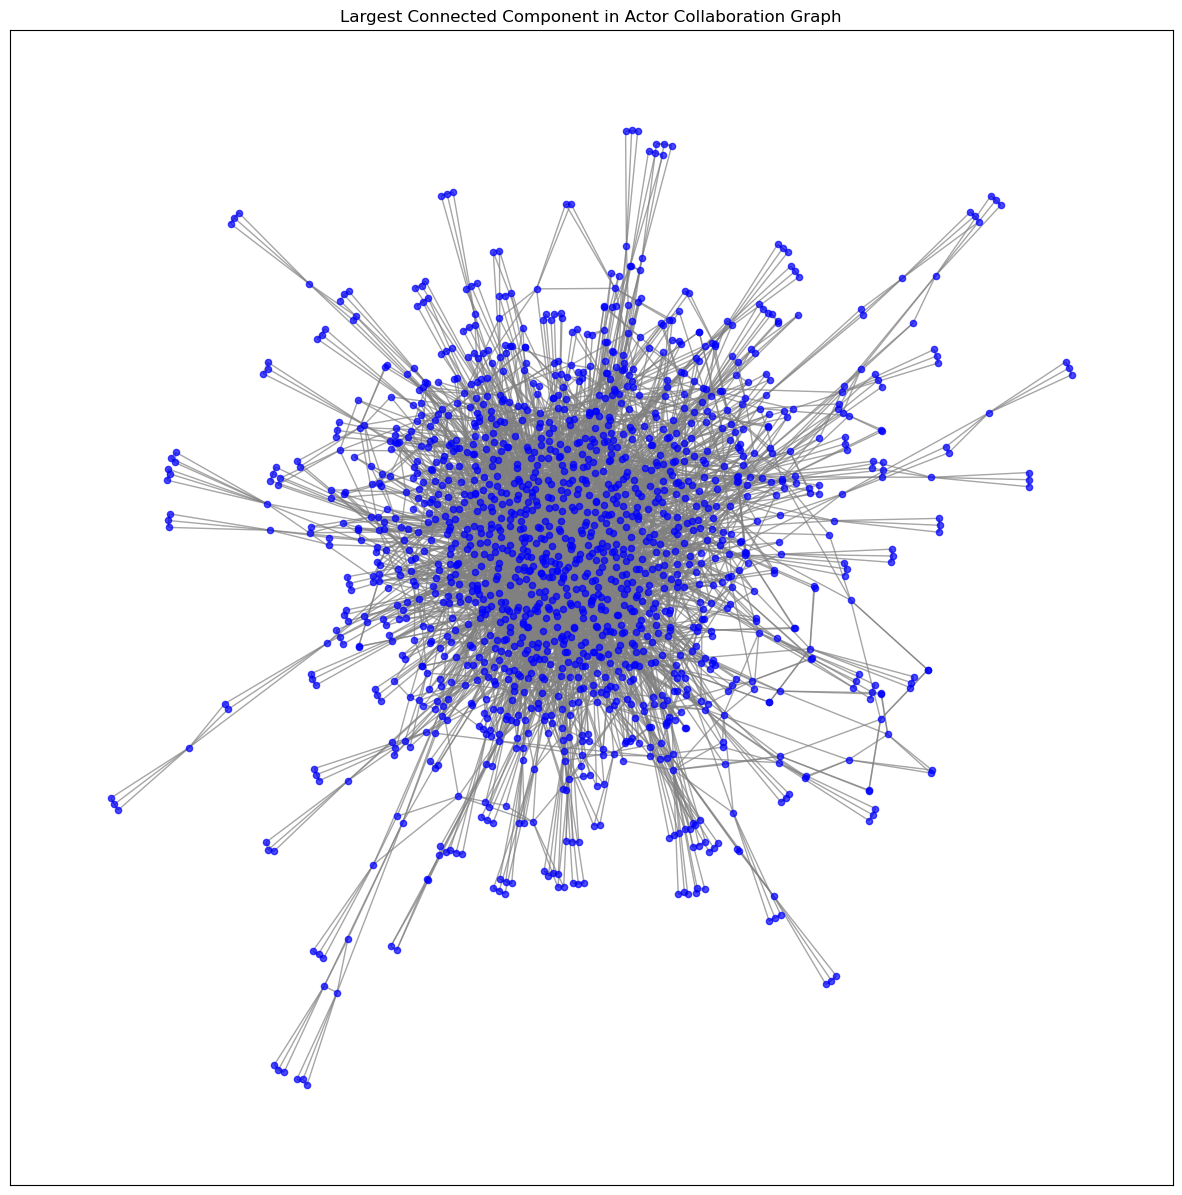

In [138]:
import itertools
import networkx as nx

# List of all pairs of actors who have appeared together
actor_pairs = []

for actors in data['Actors']:
    for pair in itertools.combinations(actors, 2):
        actor_pairs.append(pair)

# Deduplicate list
actor_pairs = list(set(actor_pairs))

# Create the graph 
G = nx.Graph()
for pair in actor_pairs:
    G.add_edge(pair[0], pair[1])

# Identify the largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph from the largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)

# Draw the largest connected component subgraph
plt.figure(figsize=(15, 15))
nx.draw_networkx(largest_cc_subgraph, with_labels=False, node_size=20, node_color='blue', alpha=0.7, edge_color='grey')
plt.title("Largest Connected Component in Actor Collaboration Graph")
plt.show()



#### Actors with highest degree centrality  

In [153]:
degree_centrality = nx.degree_centrality(largest_cc_subgraph)
# Sorting actors by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Getting the top 20 actors
top_20_actors_by_degree_centrality = sorted_degree_centrality[:20]

# Displaying the top 20 actors
for actor, centrality in top_20_actors_by_degree_centrality:
    print(f"{actor}: {centrality}")

Mark Wahlberg: 0.026905829596412554
Hugh Jackman: 0.02626521460602178
Christian Bale: 0.02370275464445868
Brad Pitt: 0.02370275464445868
Michael Fassbender: 0.021140294682895577
Anne Hathaway: 0.021140294682895577
Jake Gyllenhaal: 0.021140294682895577
Tom Hardy: 0.021140294682895577
Scarlett Johansson: 0.020499679692504803
Chloë Grace Moretz: 0.020499679692504803
Cate Blanchett: 0.020499679692504803
Anna Kendrick: 0.01985906470211403
Matthew McConaughey: 0.019218449711723252
Matt Damon: 0.019218449711723252
Leonardo DiCaprio: 0.019218449711723252
Channing Tatum: 0.019218449711723252
Josh Brolin: 0.018577834721332478
Shia LaBeouf: 0.017937219730941704
Johnny Depp: 0.017937219730941704
Gerard Butler: 0.017937219730941704


These actors are the most connected within the largest component the collaboration network, indicating that they have worked with a larger variety of actors compared to others.

#### Actors with highest eigenvector centrality  

In [154]:
eigenvector_centrality = nx.eigenvector_centrality(largest_cc_subgraph)
# Sorting actors by eigenvector centrality
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Getting the top 20 actors
top_20_actors_by_eigen_centrality = sorted_eigenvector_centrality[:20]

# Displaying the top 20 actors
for actor, centrality in top_20_actors_by_eigen_centrality:
    print(f"{actor}: {centrality}")

Christian Bale: 0.1804513128653589
Hugh Jackman: 0.13851036235866854
Brad Pitt: 0.13327605059628983
Scarlett Johansson: 0.1327318248310825
Mark Wahlberg: 0.13029767830894615
Anne Hathaway: 0.12733586888560267
Jake Gyllenhaal: 0.11673359411584754
Matt Damon: 0.11666374818988891
Leonardo DiCaprio: 0.11641836347437606
Tom Hardy: 0.11385721327720391
Josh Brolin: 0.11234641558886733
Anna Kendrick: 0.11005673472784047
Charlize Theron: 0.10987833273560872
Michael Fassbender: 0.10756585600955498
Amy Adams: 0.10198410962404762
Matthew McConaughey: 0.10092859399770056
Jessica Chastain: 0.09999265010007505
Emily Blunt: 0.09689142717771518
Joseph Gordon-Levitt: 0.09614342786447785
Ben Kingsley: 0.09609192448367974


These actors are likely to be those who have not only been prolific in their careers but also have collaborated with other significant actors.